In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("odi.csv")

In [3]:
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350894,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.2,39,0,59,18,203
350895,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.3,39,0,59,18,203
350896,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.4,38,0,59,18,203
350897,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,202,8,49.5,38,0,59,18,203


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


In [5]:
df = df.drop_duplicates()

In [6]:
score = df.groupby('mid').last()
score = score.groupby('bat_team').mean()
score

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
bat_team,,,,,,,,
Afghanistan,226.423077,8.500000,46.992308,36.384615,2.230769,27.423077,4.576923,226.423077
Asia XI,328.333333,8.000000,49.600000,45.333333,2.666667,60.666667,2.000000,328.333333
Australia,272.436242,7.530201,48.720805,42.906040,2.234899,41.979866,7.194631,272.436242
Bangladesh,226.280488,8.487805,46.826829,33.841463,2.365854,27.670732,3.963415,226.280488
Bermuda,188.500000,9.333333,47.116667,24.166667,1.833333,20.500000,2.833333,188.500000
Canada,189.111111,9.111111,42.688889,31.111111,2.888889,26.555556,2.444444,189.111111
England,262.357798,7.944954,47.654128,39.009174,2.357798,32.321101,7.431193,262.357798
Hong Kong,224.500000,8.750000,48.175000,32.750000,2.750000,44.250000,2.000000,224.500000
India,273.401786,7.508929,47.933036,40.758929,2.410714,39.875000,6.330357,273.401786


In [7]:
score_df=score['total']

In [8]:
for a in score_df.values:
    print(a)

226.42307692307693
328.3333333333333
272.43624161073825
226.28048780487805
188.5
189.11111111111111
262.35779816513764
224.5
273.4017857142857
222.15384615384616
173.9090909090909
193.125
265.7029702970297
255.52380952380952
201.0
218.8095238095238
279.6542056074766
250.64583333333334
217.28571428571428
231.1219512195122
200.34666666666666


In [9]:
sc_dict = dict()
for i in range(score_df.shape[0]):
    sc_dict[score_df.index[i]] = score_df.values[i]

Text(0.5, 1.0, 'Average Runs Scored by Each Country')

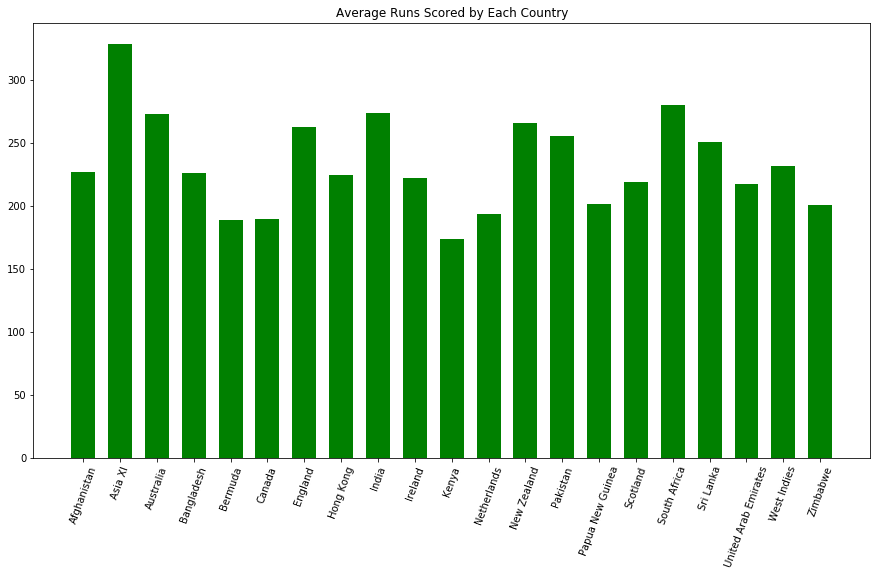

In [10]:
fig=plt.subplots(figsize=(15,8))
xpos = np.arange(score_df.shape[0])
plt.bar(xpos,sc_dict.values(),color = 'green',width=0.65)
plt.xticks(xpos,score_df.keys(),rotation = 70)
plt.title('Average Runs Scored by Each Country')

In [11]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [12]:
df2 = df.groupby('mid').last()

In [13]:
df2

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
mid,,,,,,,,,,,,,,
1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,GO Jones,JF Mooney,301,7,49.6,43,2,20,3,301
2,2006-09-05,The Rose Bowl,England,Pakistan,SCJ Broad,Naved-ul-Hasan,271,9,49.6,41,3,21,0,271
3,2006-09-08,Trent Bridge,Pakistan,England,Abdul Razzaq,J Lewis,235,8,49.6,69,0,75,9,235
4,2006-09-10,Edgbaston,Pakistan,England,Mohammad Asif,SCJ Broad,154,9,49.6,17,0,14,4,154
5,2006-06-17,Lord's,Sri Lanka,England,M Muralitharan,TT Bresnan,257,9,49.6,29,2,10,0,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,2017-07-06,"Sabina Park, Kingston",West Indies,India,KOK Williams,UT Yadav,205,9,49.6,30,2,3,0,205
1185,2017-06-30,Galle International Stadium,Sri Lanka,Zimbabwe,WU Tharanga,TL Chatara,316,5,49.6,42,1,79,1,316
1186,2017-07-02,Galle International Stadium,Zimbabwe,Sri Lanka,TL Chatara,PWH de Silva,155,10,33.4,20,4,1,0,155


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

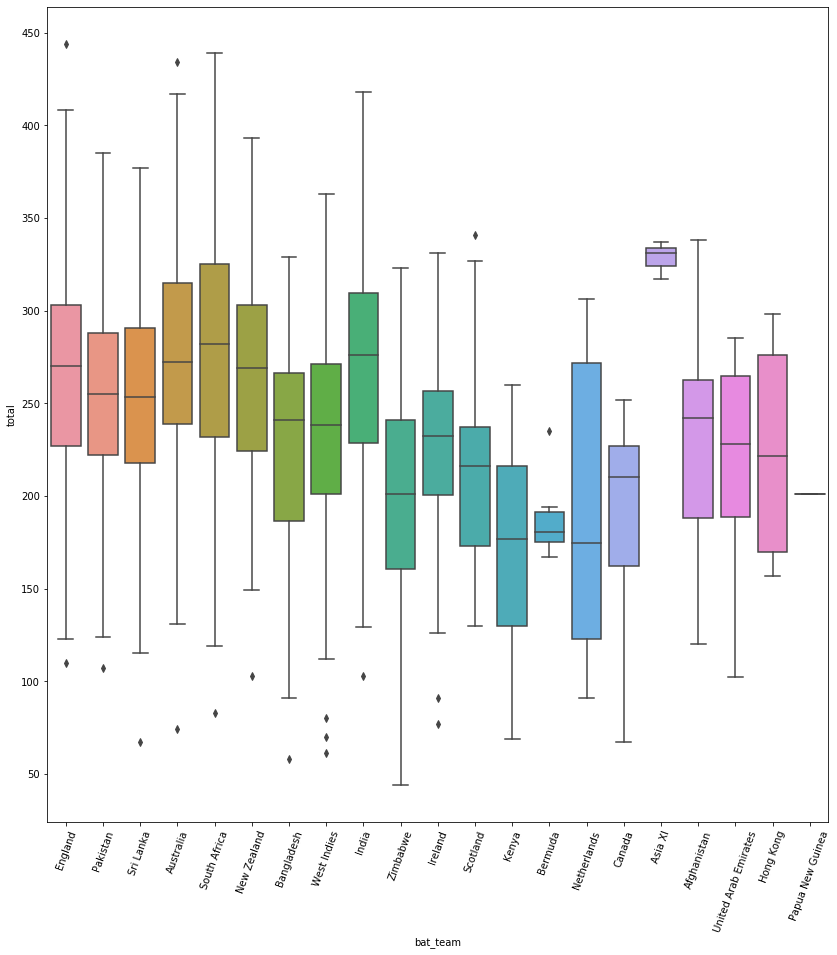

In [14]:
fig = plt.figure(figsize = (14,15))
sb.boxplot(x = 'bat_team',y='total',data=df2)
plt.xticks(rotation = 70)

In [15]:
df2 = df2.reset_index()
df_clean = df2.drop(['mid','runs','striker','non-striker','batsman','bowler','date'],axis=1)

In [16]:
df_clean

,venue,bat_team,bowl_team,wickets,overs,runs_last_5,wickets_last_5,total
0,"Civil Service Cricket Club, Stormont",England,Ireland,7,49.6,43,2,301
1,The Rose Bowl,England,Pakistan,9,49.6,41,3,271
2,Trent Bridge,Pakistan,England,8,49.6,69,0,235
3,Edgbaston,Pakistan,England,9,49.6,17,0,154
4,Lord's,Sri Lanka,England,9,49.6,29,2,257
...,...,...,...,...,...,...,...,...
1183,"Sabina Park, Kingston",West Indies,India,9,49.6,30,2,205
1184,Galle International Stadium,Sri Lanka,Zimbabwe,5,49.6,42,1,316
1185,Galle International Stadium,Zimbabwe,Sri Lanka,10,33.4,20,4,155
1186,Mahinda Rajapaksa International Cricket Stadiu...,Zimbabwe,Sri Lanka,8,49.6,50,3,310


In [17]:
df_clean = pd.get_dummies(df_clean)

In [18]:
df_clean.columns

Index(['wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total',
       'venue_AMI Stadium', 'venue_Adelaide Oval',
       'venue_Andhra Cricket Association-Visakhapatnam District Cricket Association Stadium',
       'venue_Antigua Recreation Ground, St John's',
       'venue_Arnos Vale Ground, Kingstown',
       ...
       'bowl_team_Netherlands', 'bowl_team_New Zealand', 'bowl_team_Pakistan',
       'bowl_team_Papua New Guinea', 'bowl_team_Scotland',
       'bowl_team_South Africa', 'bowl_team_Sri Lanka',
       'bowl_team_United Arab Emirates', 'bowl_team_West Indies',
       'bowl_team_Zimbabwe'],
      dtype='object', length=183)

In [19]:
X=df_clean.drop('total',axis=1).values
y=df_clean['total'].values

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
models = []
models.append(('Linear Regression',LinearRegression()))
models.append(('Ridge',Ridge(alpha = 0.005)))
models.append(('E-Net',ElasticNet(alpha = 0.003)))
models.append(('Lasso',Lasso(alpha = 0.03,max_iter = 2000)))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random-Forest',RandomForestClassifier()))

In [25]:
score = {}
for name,model in models:
    folds = KFold(n_splits = 5, shuffle = True, random_state = 1)
    scores = cross_val_score(model, X, y, scoring='r2', cv=folds)
    score[name] = scores.mean()

In [27]:
for i,j in score.items():
    print(i,j)

Linear Regression -3.593947810977457e+27
Ridge 0.7256268763350386
E-Net 0.7259825944167049
Lasso 0.7278161670546348
Decision Tree 0.4128612656217884
Random-Forest 0.38298619316425286


In [28]:
score_sorted = sorted([(x,y) for y,x in score.items()],reverse = True)

In [29]:
print( score_sorted[0][1],'Regression has the highest score and hence will be selected with score of',score_sorted[0][0])

Lasso Regression has the highest score and hence will be selected with score of 0.7278161670546348
